In [15]:
!pip install matplotlib numpy requests scikit_learn

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
from sklearn.linear_model import LinearRegression
from typing import Optional, Dict, Any, Union

# скачивание и просмотр данных

In [17]:
def get_json(endpoint: str, params: Optional[Dict[str, Any]] = None) -> Optional[Union[dict, list]]:
    """
        Get json from binance future api
    """
    url = "https://fapi.binance.com/" + endpoint
    if params:
        url += "?" + "&".join(f"{a}={b}" for (a, b) in params.items())
    response = requests.get(url)
    if response.status_code != 200:
        stderr.write(f"{url} returns {response.status_code}: {response.text}")
    try:
        return json.loads(response.text)
    except json.decoder.JSONDecodeError as e:
        stderr.write(str(e))
    return None

In [18]:
btc_list = get_json("fapi/v1/klines", {"symbol": "BTCUSDT", "limit": 1500, "interval": "1m"})
eth_list = get_json("fapi/v1/klines", {"symbol": "ETHUSDT", "limit": 1500, "interval": "1m"})

In [19]:
btc_list_close = [float(e[4]) for e in btc_list]
eth_list_close = [float(e[4]) for e in eth_list]

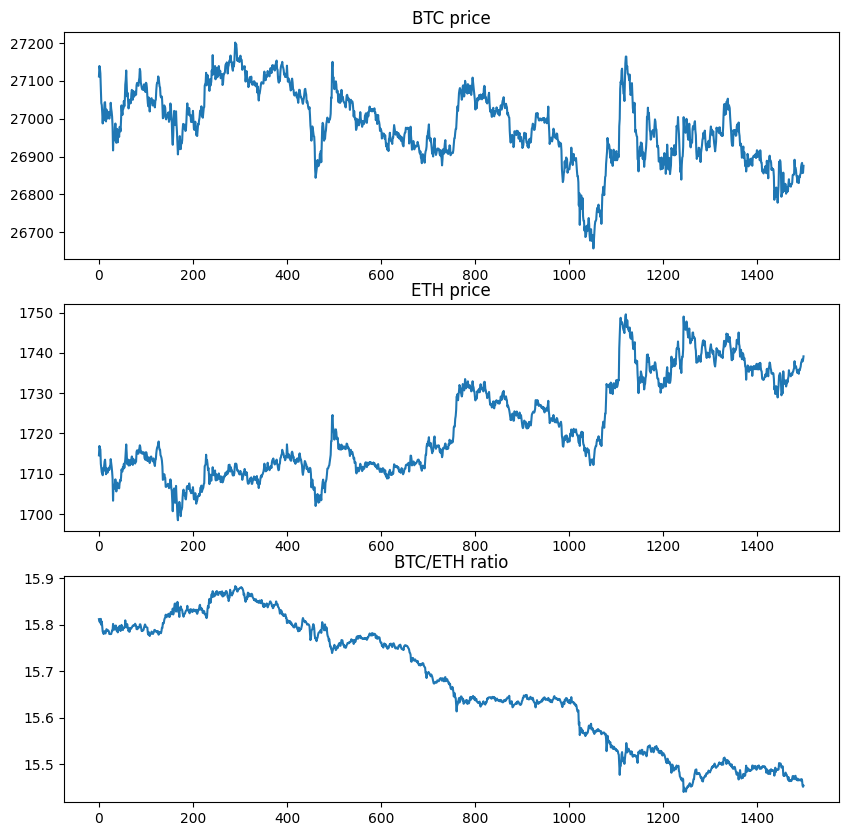

In [20]:
fig, (bplot, eplot, rplot) = plt.subplots(3, 1, figsize=(10, 10))
bplot.plot(btc_list_close)
bplot.title.set_text("BTC price")
eplot.plot(eth_list_close)
eplot.title.set_text("ETH price")
rplot.plot([b/e for (b, e) in zip(btc_list_close, eth_list_close)])
rplot.title.set_text("BTC/ETH ratio")
plt.show()

# Так как в задании нужна минимальная задержка, то буду использовать линейную регрессию, т.к. она быстрая и простая

In [21]:
x = np.array(btc_list_close).reshape((-1, 1))
y = np.array(eth_list_close)

In [22]:
model = LinearRegression(copy_X = True).fit(x, y)

In [23]:
y_ = model.predict(x)

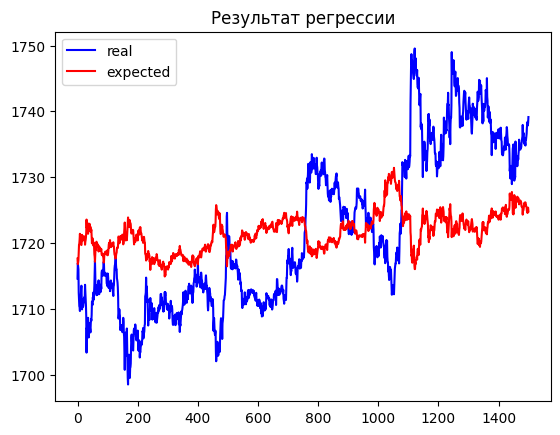

In [24]:
plt.plot(y, 'b', label='real')
plt.plot(y_, 'r', label='expected')
plt.title("Результат регрессии")
plt.legend()
plt.show()

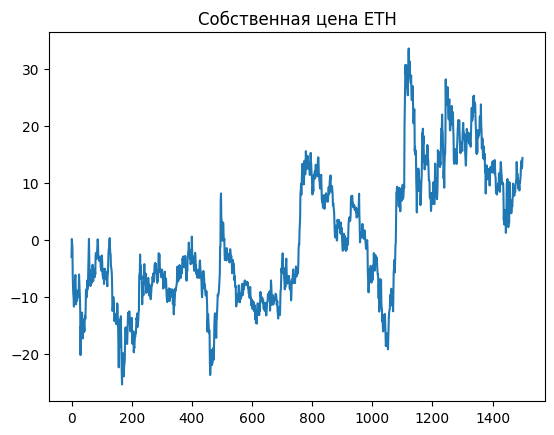

In [25]:
plt.plot(y - y_)
plt.title("Собственная цена ETH")
plt.show()

In [26]:
print(f"Коэффициенты: {model.coef_[0]} * x + {model.intercept_}")

Коэффициенты: -0.030355529769829748 * x + 2540.6044316528296


Скорее всего, если использовать модель с большим количеством параметров, собственная цена ETH/USDT вычислялась бы точнее, но более подробное исследование выходит за рамки данного тестового задания